In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,GlobalAvgPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import callbacks,optimizers
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input

In [2]:
# Make new base directory
original_dataset_dir = 'F:/New chapter/PG/DSA/EMOTION/bmanimage/two'
for i in os.listdir(original_dataset_dir):
    print(i)

test
train


In [3]:
for i in os.listdir(original_dataset_dir):
    print(i,len(os.listdir("F:/New chapter/PG/DSA/EMOTION/bmanimage/two/"+i)))

test 0
train 0


In [4]:
os.mkdir("train")
os.mkdir("test")
for i in os.listdir(original_dataset_dir):
    os.mkdir("train/"+i)
    os.mkdir("test/"+i)
    for j in os.listdir("F:/New chapter/PG/DSA/EMOTION/bmanimage/two/"+i)[:130]:
        os.rename("F:/New chapter/PG/DSA/EMOTION/bmanimage/two/"+i+"/"+j,"train/"+i+"/"+j)
    for j in os.listdir("F:/New chapter/PG/DSA/EMOTION/bmanimage/two/"+i)[:50]:
                os.rename("F:/New chapter/PG/DSA/EMOTION/bmanimage/two/"+i+"/"+j,"test/"+i+"/"+j)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'test'

In [5]:
def img_data(dir_path,target_size,batch,class_lst,preporcssing,):
    if preporcssing:
        gen_object=ImageDataGenerator(preprocessing_function=preporcssing)
    else:
        gen_object=ImageDataGenerator()

    return(gen_object.flow_from_directory(dir_path,
                                            target_size=target_size,
                                            batch_size=batch,
                                            class_mode='sparse',
                                            classes=class_lst,
                                            shuffle=True))

In [6]:
train_data_gen=img_data("train",(224,224),500,os.listdir("train"),preprocess_input)
valid_data_gen=img_data("test",(224,224),500,os.listdir("test"),preprocess_input)

Found 1400 images belonging to 14 classes.
Found 700 images belonging to 14 classes.


In [7]:
base_model=tf.keras.applications.MobileNetV2(
    input_shape=(224,224,3),alpha=1.0,include_top=False,weights="imagenet",
    input_tensor=None,pooling=None,classes=1500,
    classifier_activation='softmax')

In [8]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [9]:
base_model.trainable=False

In [10]:
model=tf.keras.models.Sequential()
model.add(base_model)
model.add(GlobalAvgPool2D())
model.add(Dense(1024,activation="relu"))
model.add(Dense(1024,activation="softmax"))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
elst=callbacks.EarlyStopping(monitor='val_loss',patience=5,mode='min')
save_ok=callbacks.ModelCheckpoint('F:/New chapter/PG/DSA/EMOTION/bmanimage/image_model.hdf5',save_best_only=True,monitor='val_loss',mode='min')

In [12]:
history=model.fit(train_data_gen,batch_size=500,validation_data=valid_data_gen,callbacks=[elst,save_ok],epochs=10)

Epoch 1/10
3/3 [==============================] - 299s 126s/step - loss: 4.6054 - accuracy: 0.1271 - val_loss: 2.1697 - val_accuracy: 0.3171
Epoch 2/10
3/3 [==============================] - 147s 50s/step - loss: 1.8927 - accuracy: 0.3979 - val_loss: 1.8833 - val_accuracy: 0.3829
Epoch 3/10
3/3 [==============================] - 101s 33s/step - loss: 1.5057 - accuracy: 0.5086 - val_loss: 1.7080 - val_accuracy: 0.4114
Epoch 4/10
3/3 [==============================] - 86s 29s/step - loss: 1.2252 - accuracy: 0.5971 - val_loss: 1.6117 - val_accuracy: 0.4471
Epoch 5/10
3/3 [==============================] - 83s 31s/step - loss: 1.0478 - accuracy: 0.6536 - val_loss: 1.5649 - val_accuracy: 0.4800
Epoch 6/10
3/3 [==============================] - 73s 25s/step - loss: 0.9485 - accuracy: 0.6971 - val_loss: 1.5436 - val_accuracy: 0.4814
Epoch 7/10
3/3 [==============================] - 176s 77s/step - loss: 0.8180 - accuracy: 0.7336 - val_loss: 1.5580 - val_accuracy: 0.4829
Epoch 8/10
3/3 [======

Text(0.5, 1.0, 'Training and validation loss')

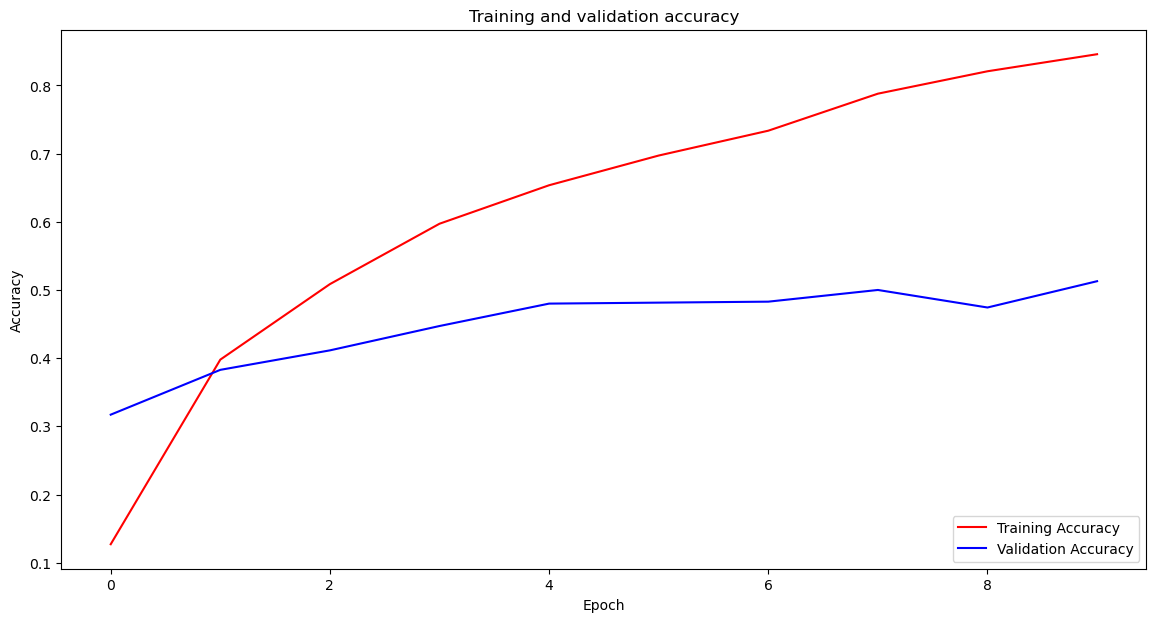

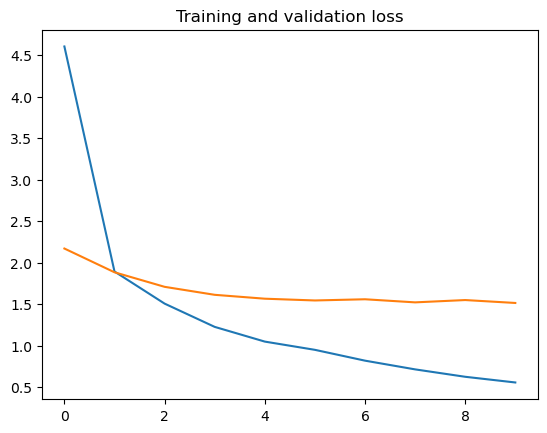

In [13]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
#plt.show()
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')